In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality-dataset/train (1).csv
/kaggle/input/apple-quality-dataset/test (1).csv


In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from scipy import stats
from colorama import Fore, init
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings ('ignore')

sns.set(style="whitegrid")


In [3]:
train_df=pd.read_csv("/kaggle/input/apple-quality-dataset/train (1).csv")
test_df=pd.read_csv("/kaggle/input/apple-quality-dataset/test (1).csv")
train_df

,Id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,3217,-3.852972,-0.542395,2.895543,-1.533350,2.573097,-0.634606,-3.135736492,good
1,2781,0.987882,-0.517975,-1.517746,1.375479,0.749638,0.883371,-0.792172479,bad
2,698,-1.104934,-0.043345,0.856840,-0.079905,2.593540,-0.586165,-3.786816268,good
3,3571,3.635594,-2.840819,-1.620447,-0.265114,3.541542,0.349432,0.6169814,good
4,2856,-0.758001,-1.823574,-2.201901,1.266085,1.161352,4.430065,-1.953020778,bad
...,...,...,...,...,...,...,...,...,...
2795,1131,1.203125,-1.887093,-2.551971,1.080267,3.499233,-0.427477,2.928774852,good
2796,1295,-1.697843,-1.791844,-1.332840,0.106406,0.585904,2.301835,-2.856913601,bad
2797,861,2.464079,-1.672946,-0.270204,-0.060312,-1.367107,4.491704,1.210290501,good
2798,3508,-1.680704,-1.174721,1.609465,0.972546,0.358214,0.495325,-0.751744832,good


In [4]:
train_df.info() # Gettting a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           2800 non-null   int64  
 1   Size         2799 non-null   float64
 2   Weight       2799 non-null   float64
 3   Sweetness    2799 non-null   float64
 4   Crunchiness  2799 non-null   float64
 5   Juiciness    2799 non-null   float64
 6   Ripeness     2799 non-null   float64
 7   Acidity      2800 non-null   object 
 8   Quality      2799 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 197.0+ KB


In [5]:
print(train_df.describe())

                Id         Size       Weight    Sweetness  Crunchiness  \
count  2800.000000  2799.000000  2799.000000  2799.000000  2799.000000   
mean   2023.427857    -0.524118    -0.961549    -0.462659     0.983925   
std    1151.846810     1.946602     1.592339     1.945357     1.411384   
min       2.000000    -7.151703    -7.149848    -6.894485    -4.495359   
25%    1021.750000    -1.875285    -1.955737    -1.713867     0.049955   
50%    2033.500000    -0.564970    -0.962762    -0.508999     1.004070   
75%    3033.500000     0.809555     0.034692     0.811097     1.899210   
max    4001.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  2799.000000  2799.000000  
mean      0.558522     0.459740  
std       1.911941     1.863833  
min      -5.961897    -5.864599  
25%      -0.738895    -0.804898  
50%       0.609298     0.458395  
75%       1.838770     1.688486  
max       7.148502     7.237837  


In [6]:
# shape of the dataset
train_df.shape

(2800, 9)

<Axes: >

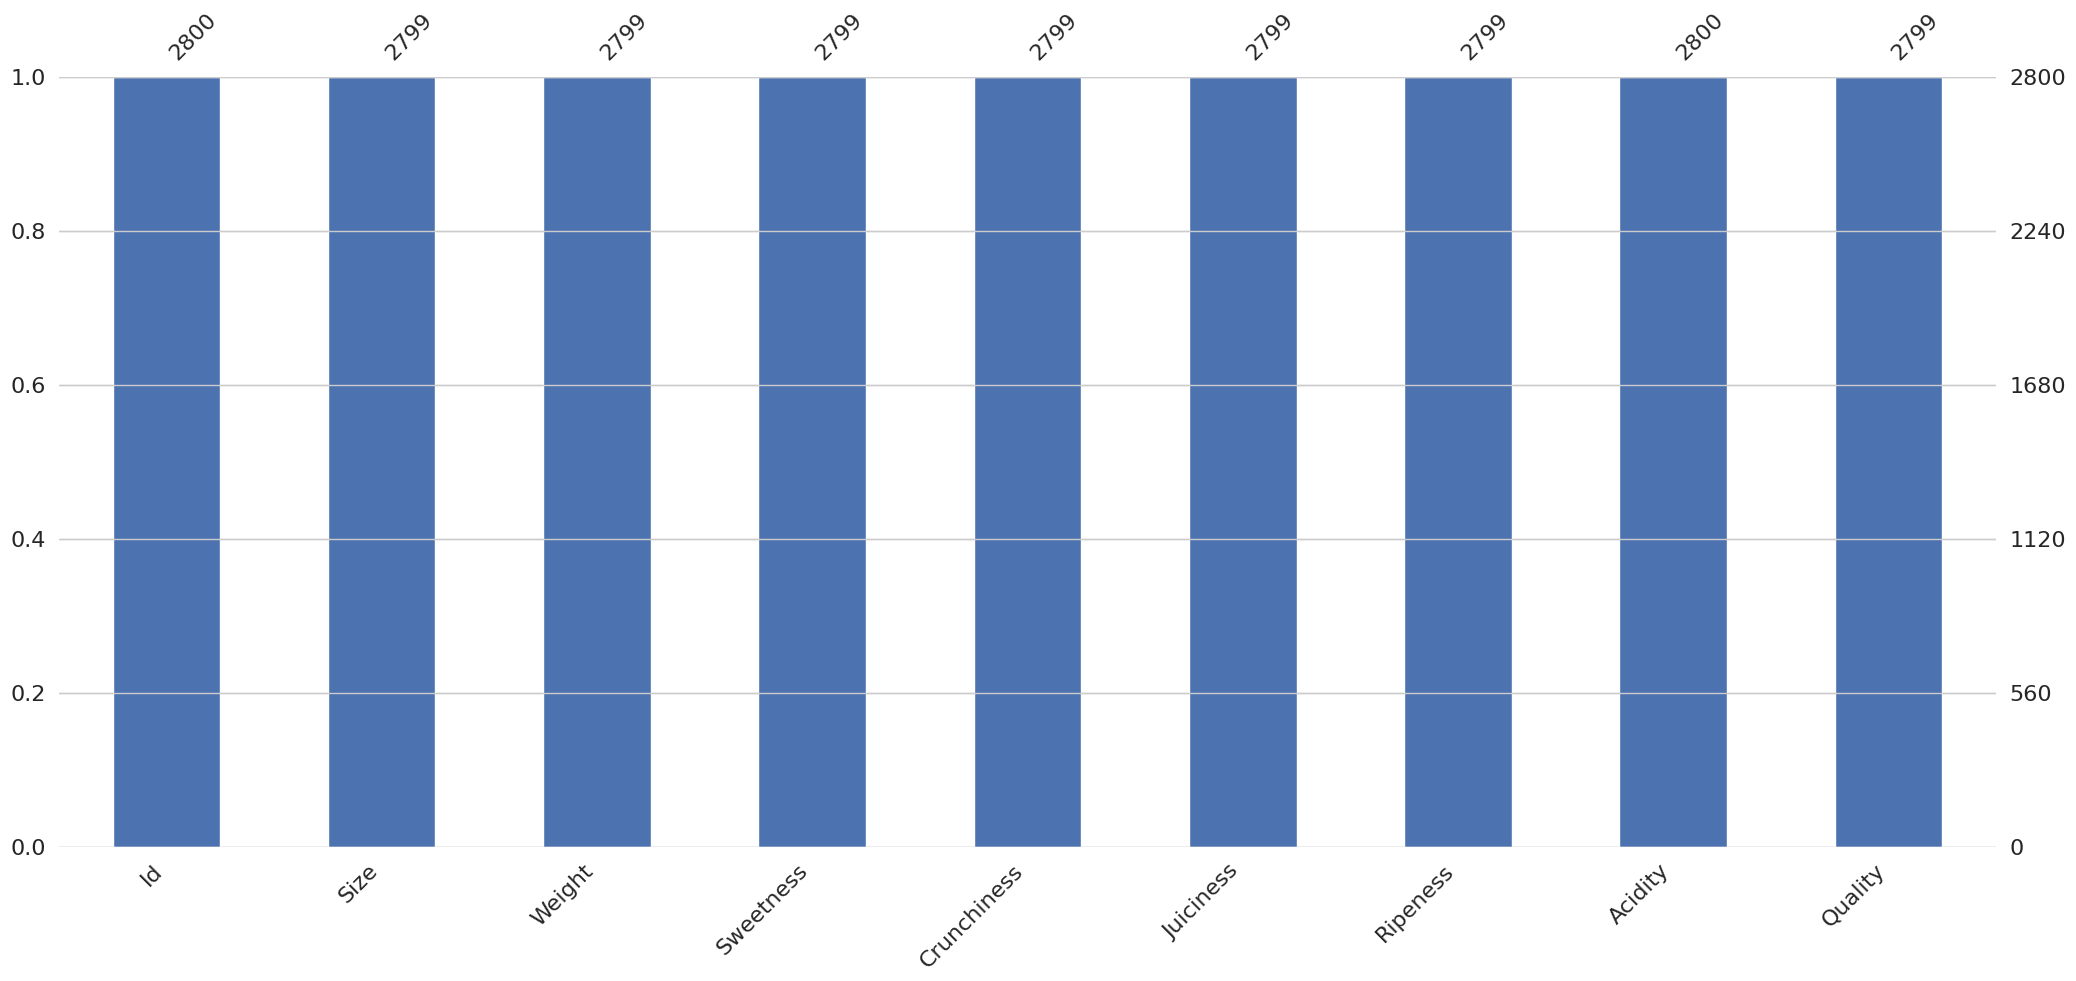

In [7]:
msno.bar(train_df, color = 'b')

In [8]:
for column in train_df.columns:
    num_distinct_values = len(train_df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Id: 2800 distinct values
Size: 2800 distinct values
Weight: 2800 distinct values
Sweetness: 2800 distinct values
Crunchiness: 2800 distinct values
Juiciness: 2800 distinct values
Ripeness: 2800 distinct values
Acidity: 2800 distinct values
Quality: 3 distinct values


In [9]:
train_df.duplicated().sum()

0

# **Data Preprocessing**

In [10]:
train_df.isnull().sum()

Id             0
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [11]:
# Drop rows with null values
train_df = train_df.dropna()

In [12]:
train_df.isnull().sum()

Id             0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [13]:
# shape of the dataset
train_df.shape

(2799, 9)

In [14]:
train_df.head()

,Id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,3217,-3.852972,-0.542395,2.895543,-1.533350,2.573097,-0.634606,-3.135736492,good
1,2781,0.987882,-0.517975,-1.517746,1.375479,0.749638,0.883371,-0.792172479,bad
2,698,-1.104934,-0.043345,0.856840,-0.079905,2.593540,-0.586165,-3.786816268,good
3,3571,3.635594,-2.840819,-1.620447,-0.265114,3.541542,0.349432,0.6169814,good
4,2856,-0.758001,-1.823574,-2.201901,1.266085,1.161352,4.430065,-1.953020778,bad


## Clean Data

In [15]:
def clean_data(train_df):
    
    train_df = train_df.drop(columns=['Id'])
    
    train_df = train_df.dropna()
    
    train_df = train_df.astype({'Acidity': 'float64'})
    
    def label(Quality):
        """
        Transform based on the following examples:
        Quality    Output
        "good"  => 0
        "bad"   => 1
        """
        if Quality == "good":
            return 0
    
        if Quality == "bad":
            return 1
    
        return None
    
    train_df['Label'] = train_df['Quality'].apply(label)
    
    train_df = train_df.drop(columns=['Quality'])
    
    train_df = train_df.astype({'Label': 'int64'})
    
    return train_df

train_df_clean = clean_data(train_df.copy())
train_df_clean.head()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.852972,-0.542395,2.895543,-1.533350,2.573097,-0.634606,-3.135736,0
1,0.987882,-0.517975,-1.517746,1.375479,0.749638,0.883371,-0.792172,1
2,-1.104934,-0.043345,0.856840,-0.079905,2.593540,-0.586165,-3.786816,0
3,3.635594,-2.840819,-1.620447,-0.265114,3.541542,0.349432,0.616981,0
4,-0.758001,-1.823574,-2.201901,1.266085,1.161352,4.430065,-1.953021,1


## Handling Categorical Data

In [16]:
label_encoder = LabelEncoder()
train_df.loc[:, 'Quality'] = label_encoder.fit_transform(train_df['Quality'])

In [17]:
train_df.head()

,Id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,3217,-3.852972,-0.542395,2.895543,-1.533350,2.573097,-0.634606,-3.135736492,1
1,2781,0.987882,-0.517975,-1.517746,1.375479,0.749638,0.883371,-0.792172479,0
2,698,-1.104934,-0.043345,0.856840,-0.079905,2.593540,-0.586165,-3.786816268,1
3,3571,3.635594,-2.840819,-1.620447,-0.265114,3.541542,0.349432,0.6169814,1
4,2856,-0.758001,-1.823574,-2.201901,1.266085,1.161352,4.430065,-1.953020778,0


In [18]:
scaler = StandardScaler()
train_df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']] = scaler.fit_transform(train_df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']])
train_df

,Id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,3217,-1.710390,0.263278,1.726573,-1.783869,1.053869,-0.587253,-1.531146,1
1,2781,0.776877,0.278617,-0.542459,0.277475,0.099977,0.227331,-0.418959,0
2,698,-0.298428,0.576741,0.678402,-0.753884,1.064563,-0.561258,-1.840129,1
3,3571,2.137291,-1.180406,-0.595261,-0.885133,1.560484,-0.059194,0.249784,1
4,2856,-0.120171,-0.541454,-0.894208,0.199953,0.315354,2.130574,-0.969863,0
...,...,...,...,...,...,...,...,...,...
2795,1131,0.887470,-0.581352,-1.074191,0.068273,1.538351,-0.476102,1.346894,1
2796,1295,-0.603069,-0.521524,-0.447392,-0.621854,0.014324,0.988513,-1.398824,0
2797,861,1.535358,-0.446842,0.098948,-0.740000,-1.007339,2.163651,0.531352,1
2798,3508,-0.594263,-0.133897,1.065354,-0.008064,-0.104785,0.019096,-0.399773,1


## Data Visualization

## Univariate

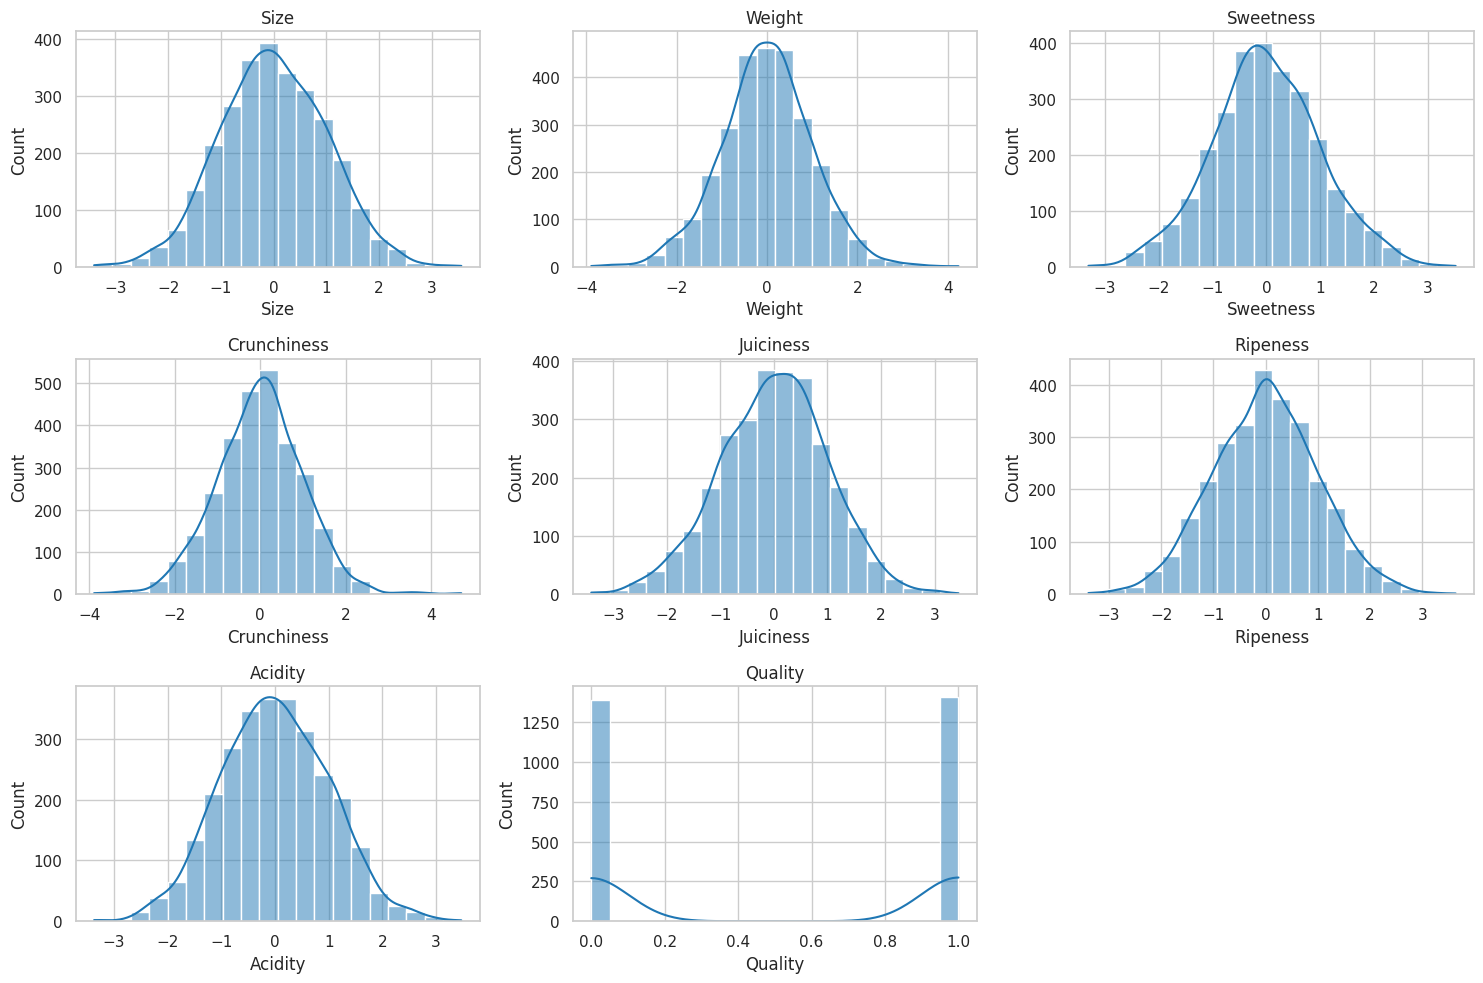

In [19]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=train_df, x=column, kde=True, bins=20)  # Use sns.histplot for newer versions
    plt.title(column)

plt.tight_layout()
plt.show()


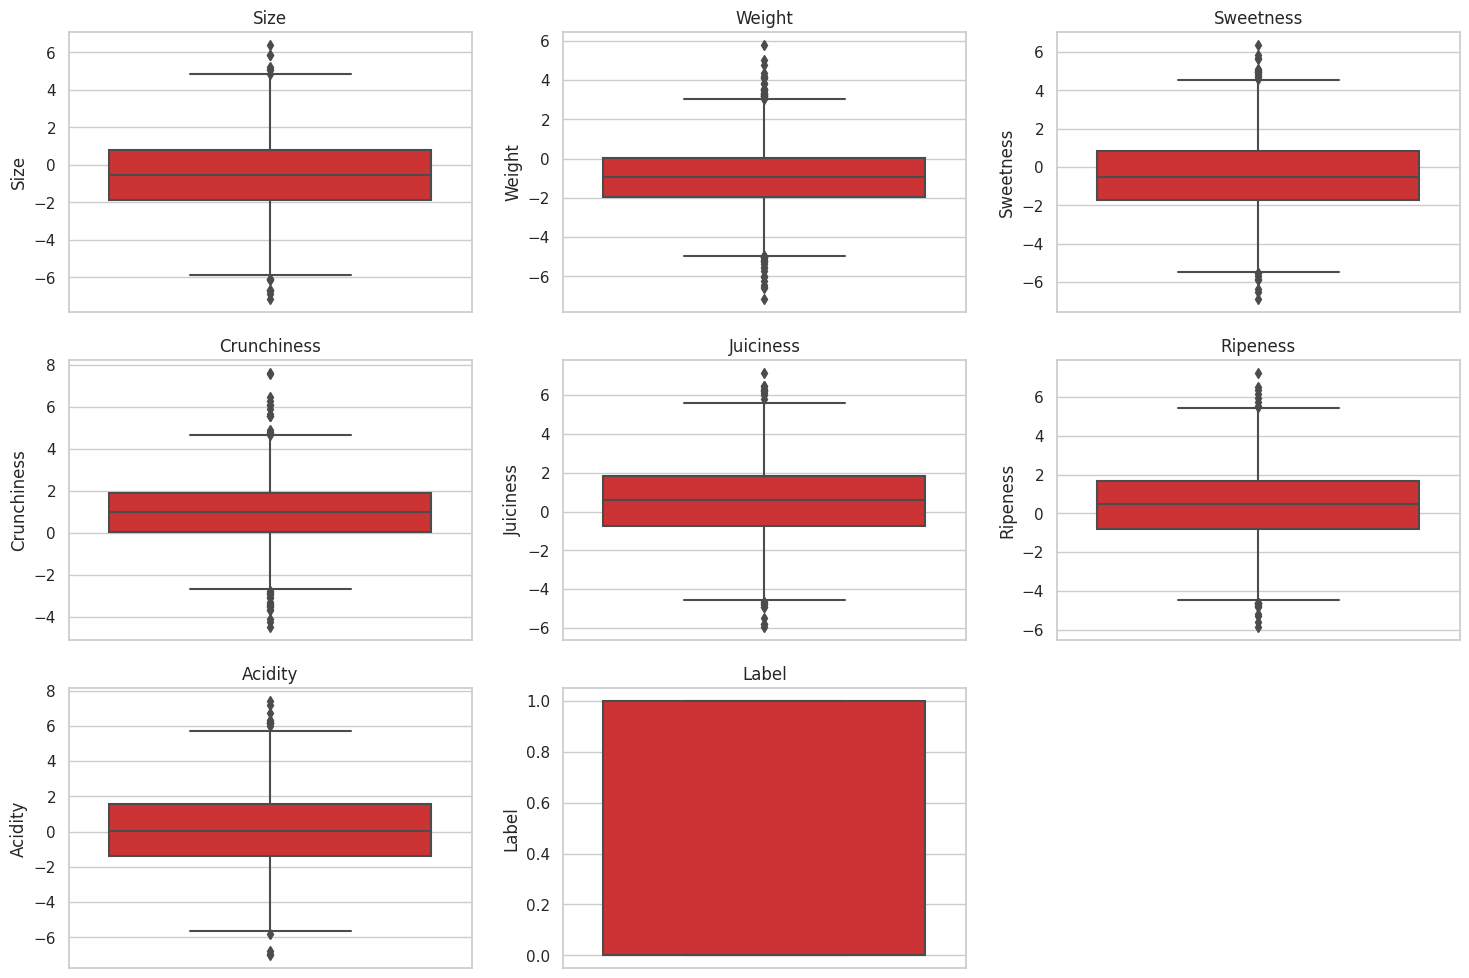

In [20]:
numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity','Label']

plt.figure(figsize=(15, 10))
sns.set_palette("Set1")
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train_df_clean[column])
    plt.title(column)

plt.tight_layout()
plt.show()


## Bivariate 

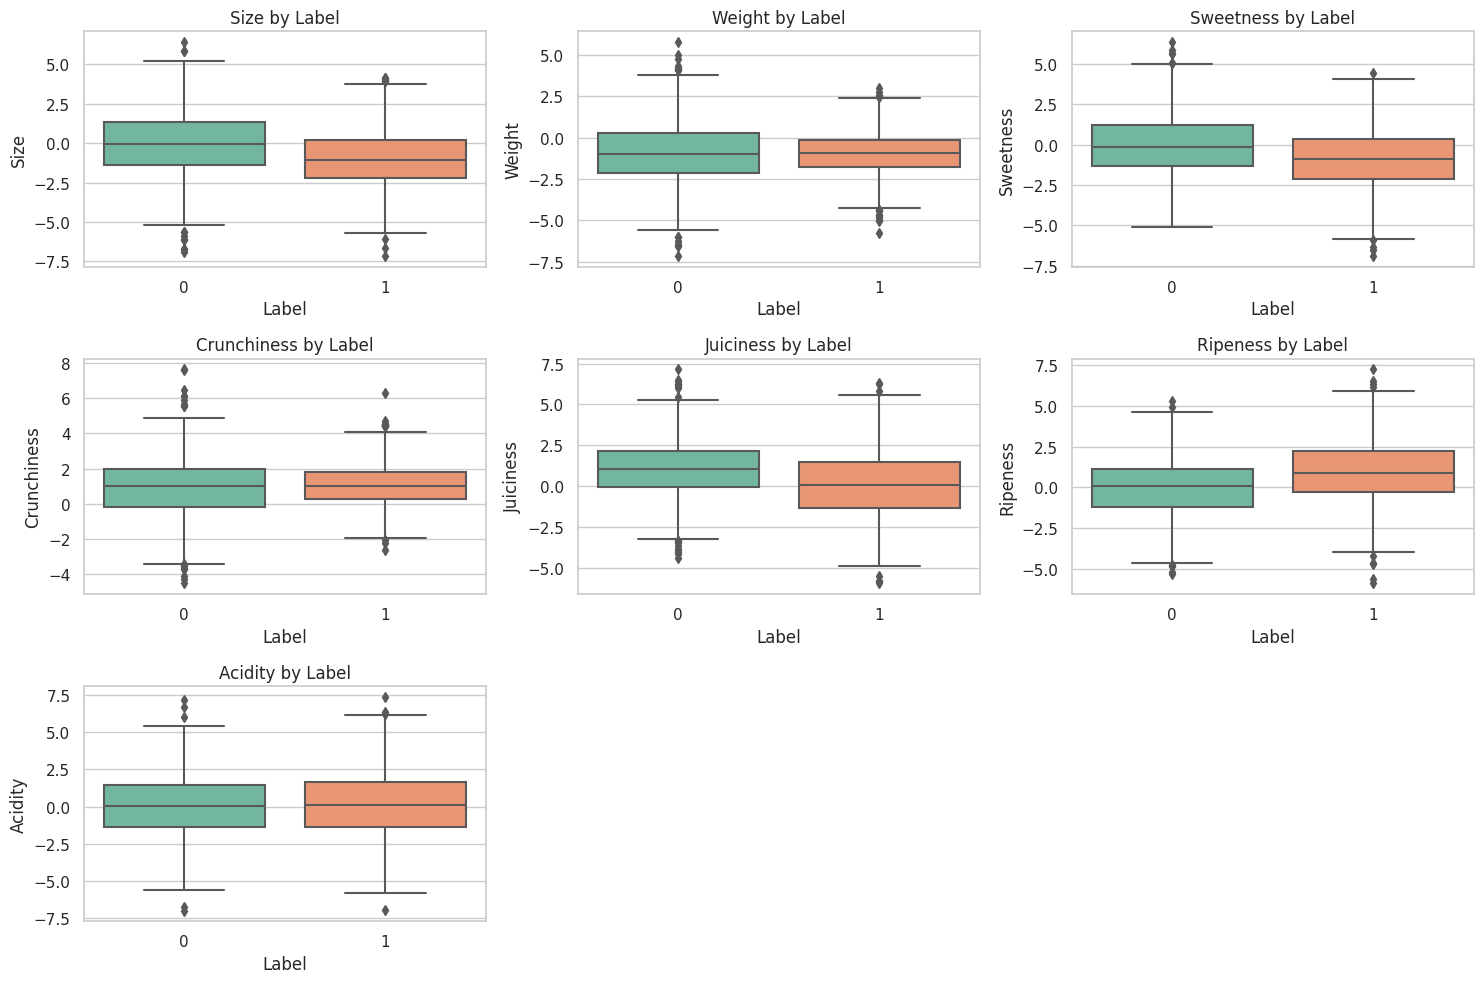

In [21]:
plt.figure(figsize=(15, 10))
sns.set_palette("Set2")

for i, column in enumerate(train_df_clean.columns[:-1]):  
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Label', y=column, data=train_df_clean)
    plt.title(f'{column} by Label')
plt.tight_layout()
plt.show()


## Multivariate

<Figure size 800x800 with 0 Axes>

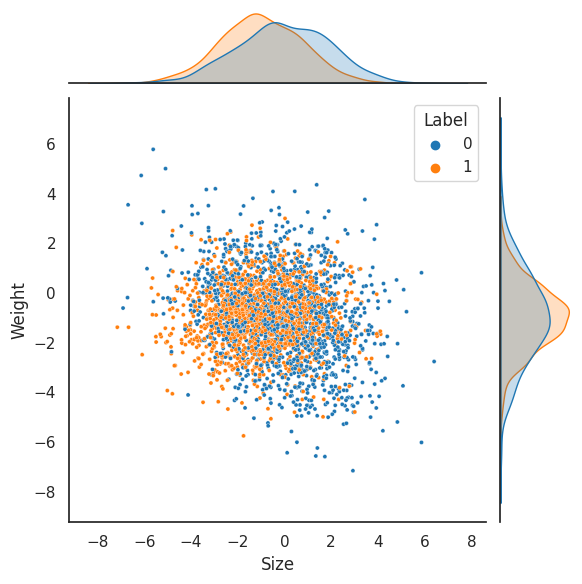

In [22]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Size', y='Weight', hue='Label', data=train_df_clean, palette='tab10', s=9)

<Figure size 800x800 with 0 Axes>

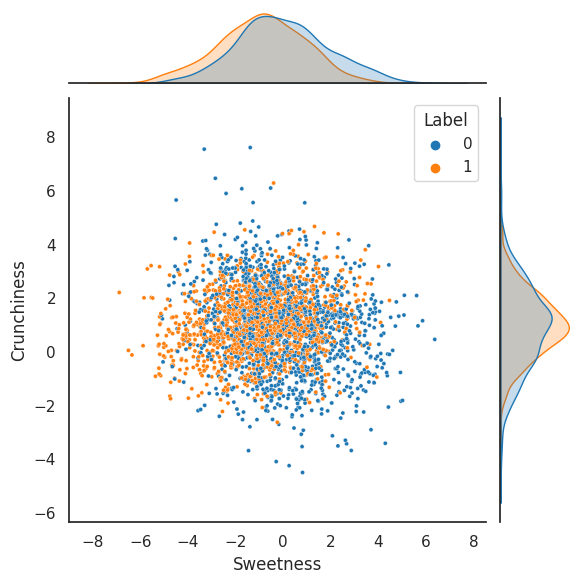

In [23]:
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.jointplot(x='Sweetness', y='Crunchiness', hue='Label', data=train_df_clean, palette='tab10', s=9)

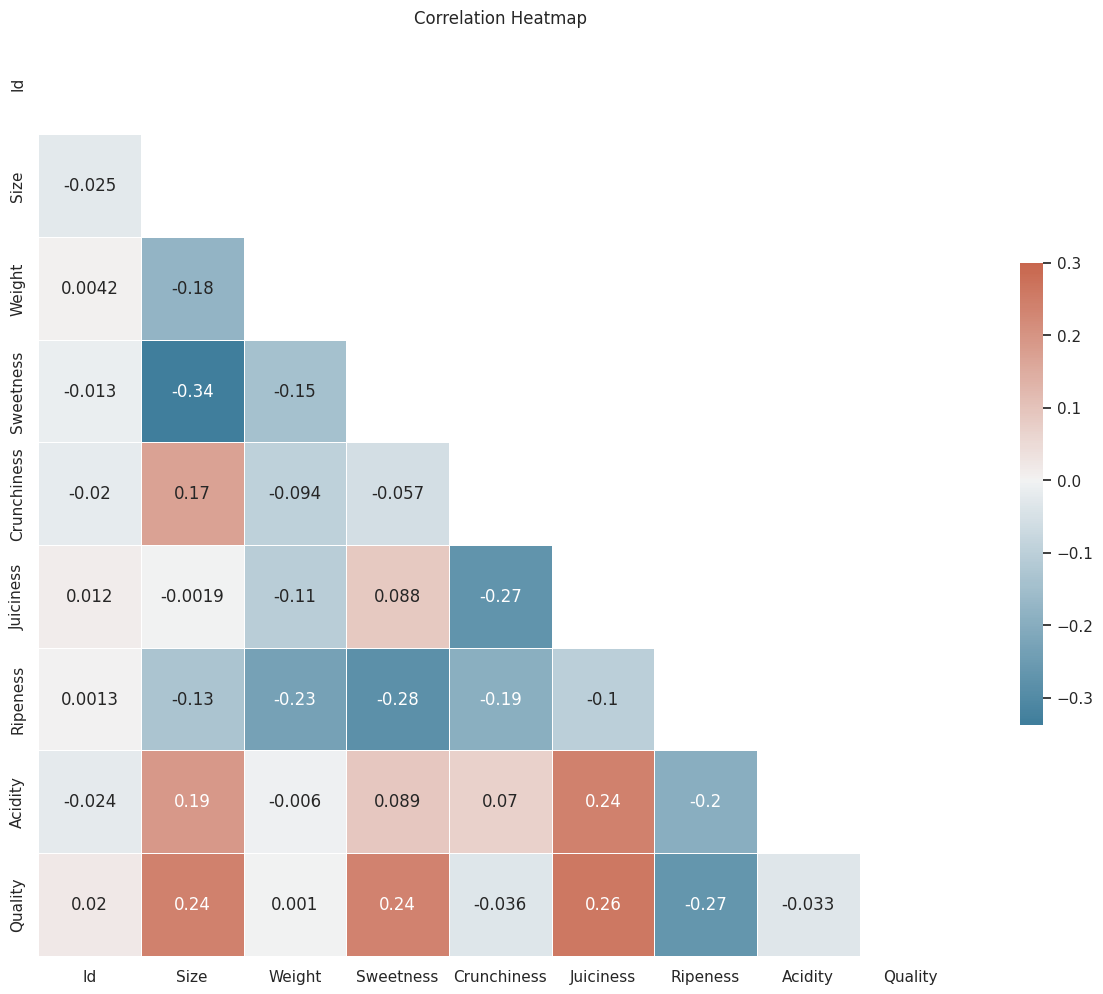

In [24]:
corr = train_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

## Outliers

In [25]:
numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity']

robust_scaler = RobustScaler()

train_df_clean[numerical_features] = robust_scaler.fit_transform(train_df_clean[numerical_features])

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

for feature in numerical_features :
    num_outliers = count_outliers(train_df_clean[feature])
    print(f'Number of outliers in {feature}: {num_outliers}')

Number of outliers in Size: 15
Number of outliers in Weight: 46
Number of outliers in Sweetness: 21
Number of outliers in Crunchiness: 30
Number of outliers in Juiciness: 20
Number of outliers in Ripeness: 20
Number of outliers in Acidity: 14


## Hypothesis Testing

T-statistic: 0.7157215669330227
P-value: 0.4741931532617907


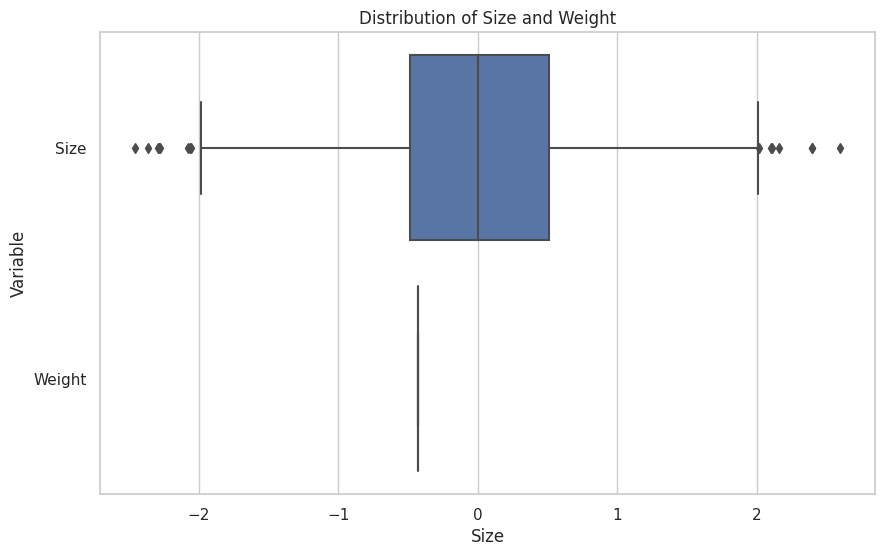

T-statistic: -0.84518180584325
P-value: 0.39804547298414983


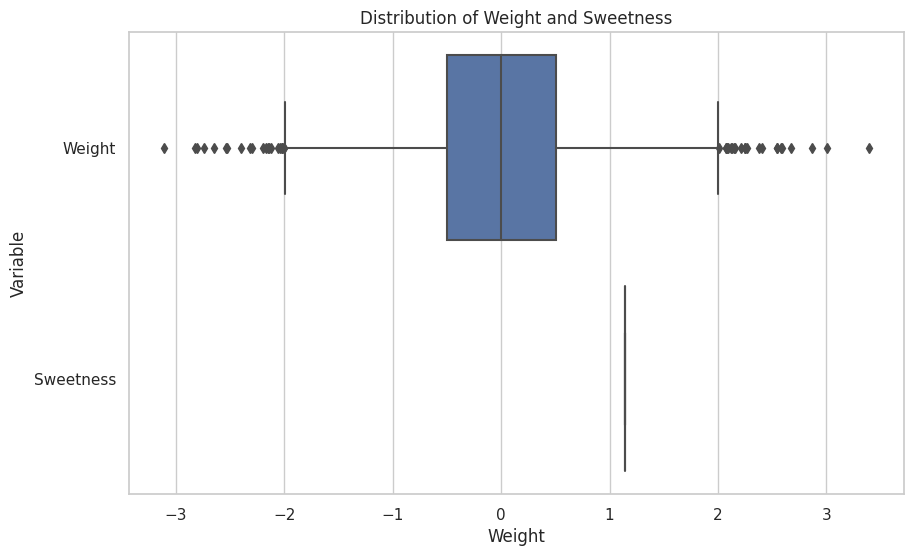

T-statistic: 1.4267791473194646
P-value: 0.15369935324134668


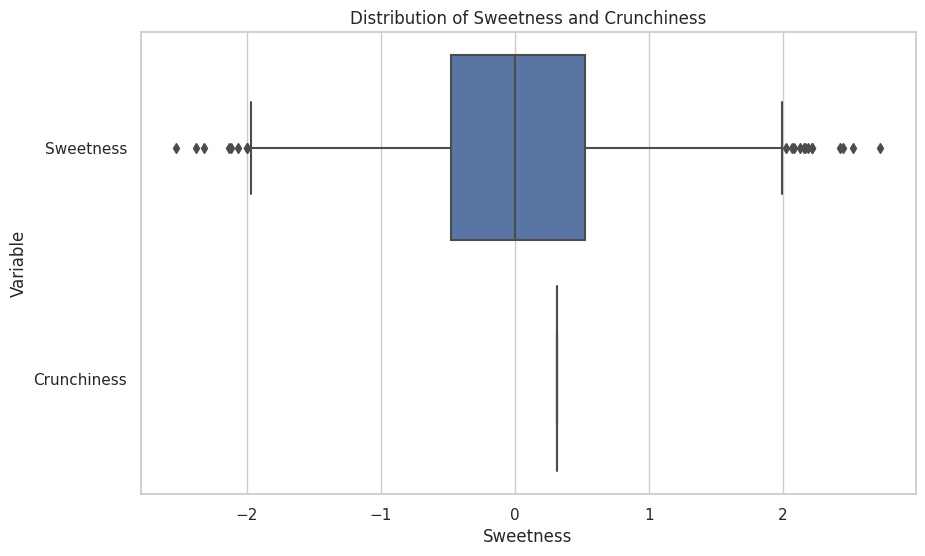

T-statistic: 0.4376891920349891
P-value: 0.6616284971762156


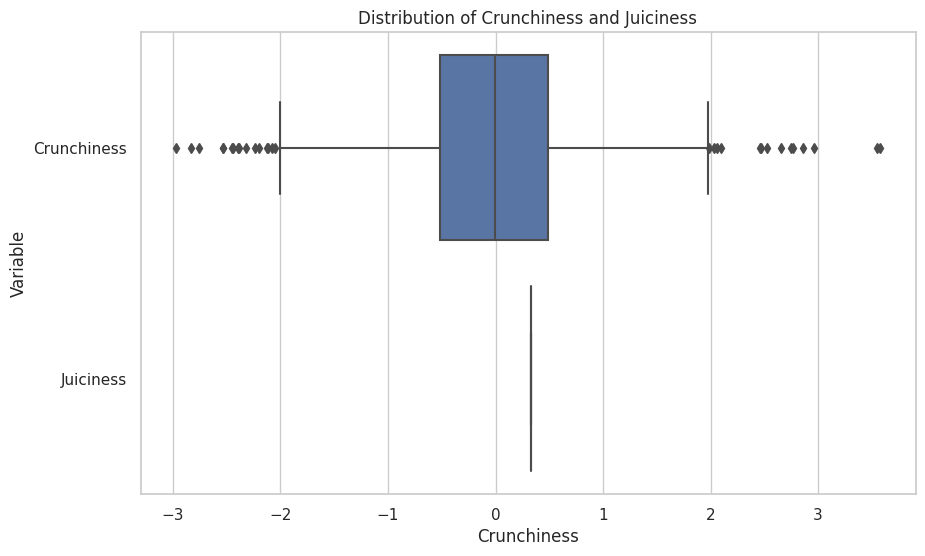

T-statistic: -1.0167277019416687
P-value: 0.30932693876156375


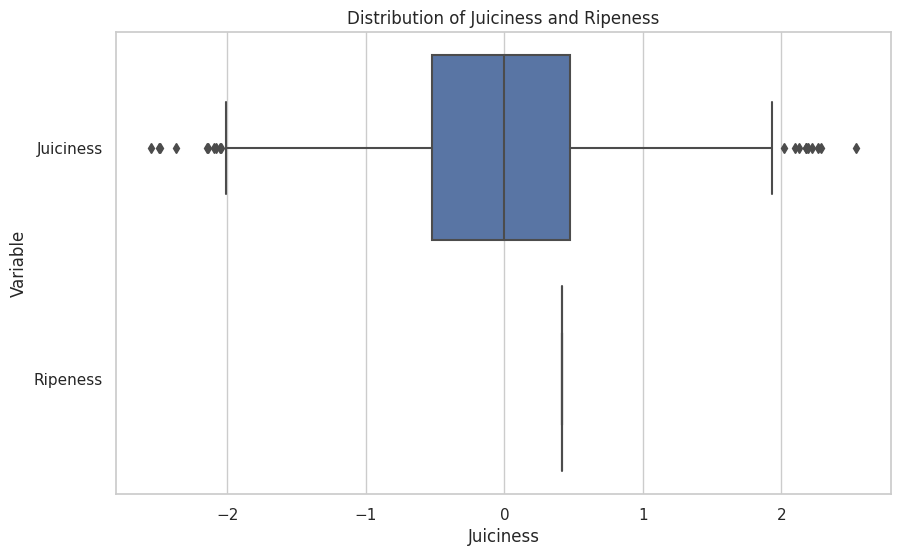

T-statistic: -0.9496233477501284
P-value: 0.3423446794182138


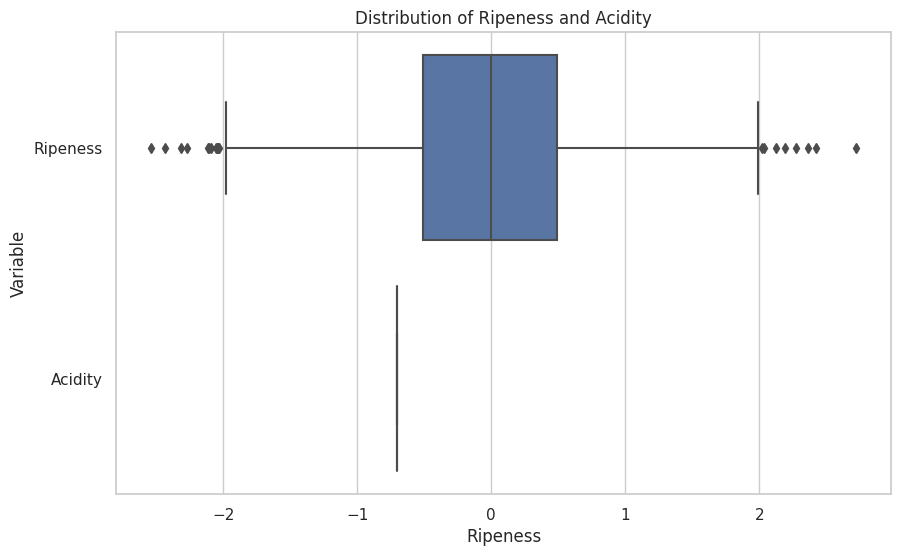

In [26]:
sns.set(style="whitegrid")


def hypothesis_testing(df, column1, column2):
    t_stat, p_val = stats.ttest_ind(df[column1], df[column2])
    
    print("T-statistic:", t_stat)
    print("P-value:", p_val)
    
   
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column1], y="Variable", data=pd.melt(df[[column1, column2]], var_name="Variable"))
    plt.title(f'Distribution of {column1} and {column2}')
    plt.show()

columns_for_testing = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

for i in range(len(columns_for_testing) - 1):
    hypothesis_testing(train_df_clean, columns_for_testing[i], columns_for_testing[i + 1])


## Imbalance Data

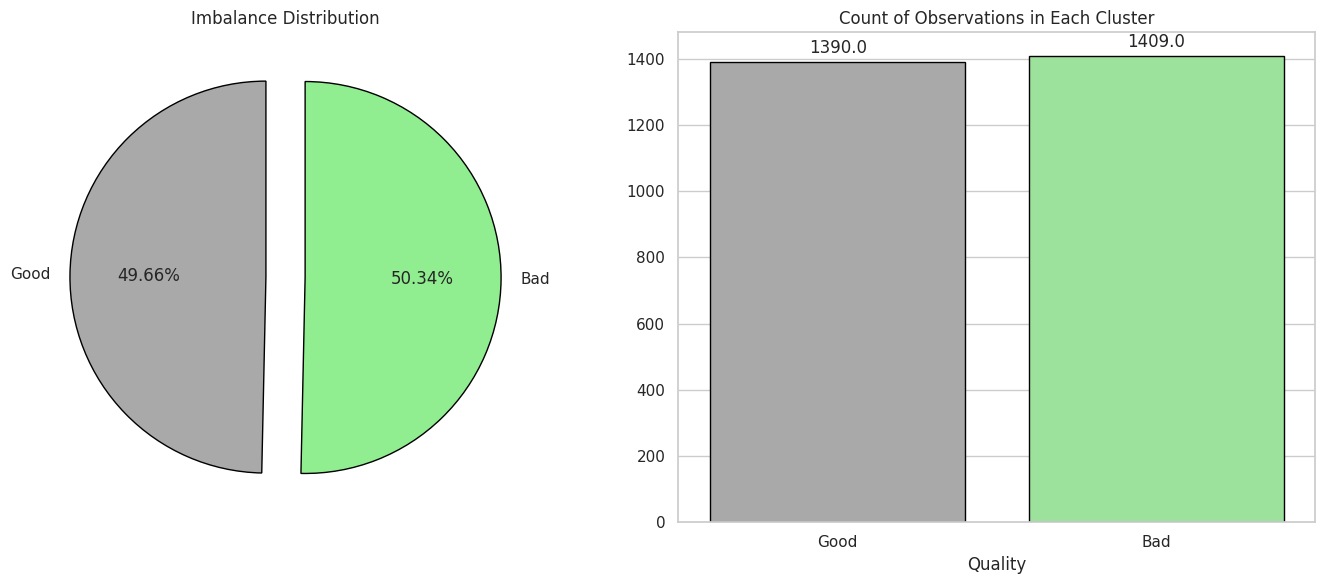

In [27]:
good_count = train_df['Quality'].eq(0).sum()
bad_count = train_df['Quality'].eq(1).sum()
total_count = len(train_df)

good_percentage = (good_count / total_count) * 100
bad_percentage = (bad_count / total_count) * 100

Quality_counts = train_df['Quality'].value_counts()

plt.figure(figsize=(14, 6))

# Subplot 1 - Pie Chart
plt.subplot(1, 2, 1)
pie_values = [good_percentage, bad_percentage]
colors = ['darkgrey', 'lightgreen']
plt.pie(pie_values, labels=['Good', 'Bad'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Imbalance Distribution')

# Subplot 2 - Bar Chart
plt.subplot(1, 2, 2)
colors = ['darkgrey', 'lightgreen']
ax = sns.barplot(x=Quality_counts.index, y=Quality_counts.values, palette=colors, edgecolor='black')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_xticks([0, 1])  
ax.set_xticklabels(['Good', 'Bad'])
plt.title('Count of Observations in Each Cluster')

plt.tight_layout()
plt.show()


## Splitting Data into X and y

In [28]:
X = train_df.drop('Quality', axis =1)
y = train_df['Quality']

In [31]:
# Convert the nullable integer column to a regular integer column
y = y.astype('int64', copy=False)

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [32]:
X_resampled.describe().T.style.background_gradient(axis=0, cmap='viridis')

,count,mean,std,min,25%,50%,75%,max
Id,2818.000000,0.505314,0.288197,0.000000,0.254192,0.507633,0.758196,1.000000
Size,2818.000000,0.488453,0.143446,0.000000,0.388846,0.485467,0.586850,1.000000
Weight,2818.000000,0.478049,0.122774,0.000000,0.401519,0.477646,0.554670,1.000000
Sweetness,2818.000000,0.484467,0.146531,0.000000,0.390392,0.481006,0.580390,1.000000
Crunchiness,2818.000000,0.452336,0.116403,0.000000,0.375242,0.453958,0.527826,1.000000
Juiciness,2818.000000,0.496981,0.145880,0.000000,0.398378,0.500851,0.594797,1.000000
Ripeness,2818.000000,0.482966,0.142123,0.000000,0.386610,0.482684,0.576670,1.000000
Acidity,2818.000000,0.492429,0.146168,0.000000,0.390121,0.488404,0.592421,1.000000


## Split Data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Modeling

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


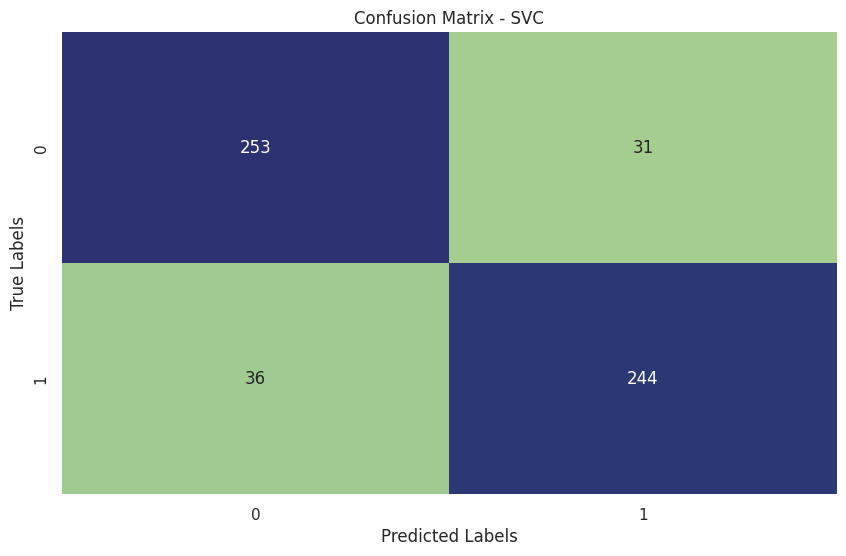


Accuracy of Support Vector Classifier: 88.12056737588652 


Confusion Matrix:
[[253  31]
 [ 36 244]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       284
           1       0.89      0.87      0.88       280

    accuracy                           0.88       564
   macro avg       0.88      0.88      0.88       564
weighted avg       0.88      0.88      0.88       564



In [34]:
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svc = SVC()

randomized_search = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

randomized_search.fit(X_train, y_train)

best_params = randomized_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_svc_model = randomized_search.best_estimator_
svc_predicted = best_svc_model.predict(X_test)

svc_acc_score = accuracy_score(y_test, svc_predicted)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)

plt.figure(figsize=(10, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("\nAccuracy of Support Vector Classifier:", svc_acc_score * 100, '\n')
print("\nConfusion Matrix:")
print(svc_conf_matrix)
print("Classification Report:")
print(classification_report(y_test, svc_predicted))


In [35]:
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

rf = RandomForestClassifier()

randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

randomized_search_rf.fit(X_train, y_train)

best_params_rf = randomized_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

best_rf_model = randomized_search_rf.best_estimator_

rf_predicted = best_rf_model.predict(X_test)

rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)

print("\nConfusion Matrix for Random Forest:")
print(rf_conf_matrix)
print("\nAccuracy of Random Forest Classifier:", rf_acc_score * 100, '\n')
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predicted))


Best Hyperparameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}

Confusion Matrix for Random Forest:
[[242  42]
 [ 33 247]]

Accuracy of Random Forest Classifier: 86.70212765957447 

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       284
           1       0.85      0.88      0.87       280

    accuracy                           0.87       564
   macro avg       0.87      0.87      0.87       564
weighted avg       0.87      0.87      0.87       564



In [37]:
# Fit the RandomizedSearchCV
randomized_search.fit(X_train, y_train)

# Get the best estimator
best_svc_model = randomized_search.best_estimator_

# Predict the labels for the test set
test_predictions = best_svc_model.predict(test_df)

# Convert the predicted labels to the original form (good or bad)
test_predictions = ['good' if label == 0 else 'bad' for label in test_predictions]

# Create a DataFrame with the predicted labels
submission_df = pd.DataFrame({
    'Id': test_df['Id'],
    'Quality': test_predictions
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission3.csv', index=False)
